<a href="https://colab.research.google.com/github/anjay1101/Austin-Powers/blob/master/Austin_Powers_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using fastai for Text Classification of Articles
It looks like it didn't work too well compared to our group project, only getting a **53% accuracy**. I think this might be because the pre-trained architecture is for a language model and not simply tokens, whereas we loaded this as tokens. 

We could try this again and load it as tokens. Plus avoid using a pre-trained model once we know how to do so. 

In [0]:
import pandas as pd
from fastai import *
from fastai.text import *

In [0]:
train = pd.read_csv("/content/drive/My Drive/Colab/Data/Austin_Powers/training.csv")
test = pd.read_csv("/content/drive/My Drive/Colab/Data/Austin_Powers/test.csv")

In [3]:
train.head() #check out data

,article_number,article_words,topic
0,1,"open,absent,cent,cent,cent,stock,inflow,rate,k...",FOREX MARKETS
1,2,"morn,stead,end,end,day,day,day,patch,patch,pat...",MONEY MARKETS
2,3,"socc,socc,world,world,recent,law,fifa,fifa,fif...",SPORTS
3,4,"open,forint,forint,forint,forint,cent,cent,ste...",FOREX MARKETS
4,5,"morn,complet,weekend,minut,minut,minut,arrow,d...",IRRELEVANT


In [0]:
#replace each comma with a space, since commas aren't tokens
for i in range(train.shape[0]):
  train.iloc[i,1] = train.iloc[i,1].replace(","," ")
#train.head()

In [0]:
for i in range(test.shape[0]):
    test.iloc[i,1] = train.iloc[i,1].replace(","," ")

In [5]:
data_cls = TextClasDataBunch.from_df('/content/drive/My Drive/Colab',train_df=train,valid_df = test,text_cols='article_words',label_cols=2,bs=16)

In [10]:
data_cls.show_batch()

text,target
xxbos horticultur telephon world world royal xxwrep 27 janu americ americ sunday sunday sunday aid hele qual restrain xxwrep 12 minist ambassador jan budget budget attend attend congress congress group measur xxwrep 17 social term xxwrep 13 friday textil tel green green green swed framework pape franc jean xxwrep 53 hold xxwrep 6 continu limit ideolog bangeman tpn tpn rue xxwrep 10 intern xxwrep 15 meet xxwrep 21 june labor,IRRELEVANT
xxbos provid provid provid engineer engineer engineer count count count xxwrep 14 centur recent recent initial relist relist minor minor minor turnaround acquir acquir assur assur institut xxwrep 20 end xxwrep 7 earn electron electron stand stand affil capit xxwrep 7 includ xxwrep 14 invest bank xxwrep 8 special put xxwrep 4 continu busi busi busi note note regard offic xxwrep 10 expend reflect reflect reform hold hold hold xxwrep,IRRELEVANT
xxbos rtr xxwrep 4 beat emotion xxwrep 7 world cup cup halftim south xxwrep 9 match xxwrep 4 sunday xxwrep 10 scor xxwrep 5 minut torn seek penalt penalt stand xxwrep 7 play won pont thrash lost friday friday friday point point fullback convinc straightforward top top top xxwrep 9 final victor victor victor scotland hold hold hold divenut time limit limit limit immed adelaid break break xxwrep 5 record,SPORTS
xxbos stop afford page page janu janu wheel bomb door nake count count count minut minist suppos attend horror worry orang term xxwrep 4 point cloth light light hold continu time pull holy jawaharl nehru nehru nehru die xxwrep 6 meet year year xxunk ash ash hand hand xxwrep 5 offic terrac doct wait wait devot devot unity surrend fortnight xxwrep 4 pass fell fell xxwrep 7 fast compos finish,IRRELEVANT
xxbos hit hope con xxwrep 6 engineer world world rate count debat xxwrep 4 recent estimat assoc worldw smart assur acquir regul end softwar limit arm spin group tissu prospect xxwrep 4 capit mother mother invest invest invest pharmaceutic pharmaceutic build put predict predict predict work compon medicin medicin foodstuff prematur busi heredit expert offic mull final final eventual prop grow sheep involut hap hap june account time time time,SHARE LISTINGS


In [13]:
learn = text_classifier_learner(data_cls, AWD_LSTM, drop_mult=0.5)

In [14]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


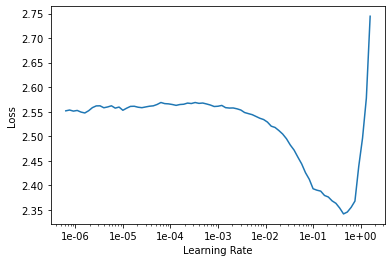

In [15]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5, 2e-2, moms=(0.8,0.7))
#interesting, why has it reached a still point?

epoch,train_loss,valid_loss,accuracy,time
0,1.639192,1.591927,0.532000,00:14
1,1.630301,1.591243,0.532000,00:13
2,1.611723,1.563388,0.532000,00:11
3,1.613797,1.564986,0.532000,00:11
4,1.620071,1.562749,0.532000,00:14


In [0]:
learn.save('0.53')

In [20]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.541871,1.602125,0.520000,00:14


In [21]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.401389,11.411877,0.492000,00:36
1,1.277663,1.786113,0.452000,00:32


In [0]:
learn.save('0.45');

In [0]:
learn.load('0.53');

Oof. Looks like it isn't doing too well. I wonder why that is. Could be because it's already been tokenized, and thus isn't natural text. 

In [0]:
RNN = RNNLearner(data_cls,learn.model)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


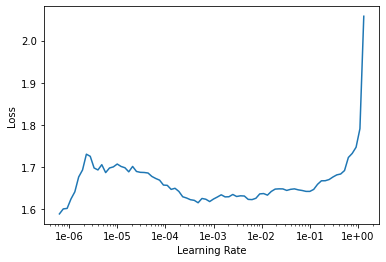

In [26]:
RNN.lr_find()
RNN.recorder.plot()

In [29]:
RNN.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.705774,1.580419,0.532000,00:37
1,1.629723,1.550573,0.532000,00:30
2,1.608413,1.553098,0.532000,00:34


epoch,train_loss,valid_loss,accuracy,time
